<a href="https://colab.research.google.com/github/souban1234/sou12345/blob/master/Text_Generation_Using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# PROBLEM STATEMENT

## Use the data from Lord of Rings file and create a generation of new textbased on the LORmethod.The objective is topredict the next 100 words of the given sentence from the training data set.Datacan be obtained fromthe following link:
https://raw.githubusercontent.com/wess/iotr/master/lotr.txt

In [2]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Embedding
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
import string
import requests
from keras.layers import TimeDistributed
from keras.layers import Bidirectional


In [3]:
!wget https://raw.githubusercontent.com/wess/iotr/master/lotr.txt

--2022-08-15 04:06:36--  https://raw.githubusercontent.com/wess/iotr/master/lotr.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3262595 (3.1M) [text/plain]
Saving to: ‘lotr.txt’

lotr.txt            100%[===================>]   3.11M  --.-KB/s    in 0.07s   

2022-08-15 04:06:37 (46.6 MB/s) - ‘lotr.txt’ saved [3262595/3262595]



In [4]:
tokenizer=Tokenizer()
data=open("/content/lotr.txt").read()
corpus=data.lower().split("\n")[:1000]
tokenizer.fit_on_texts(corpus)
total_words=len(tokenizer.word_index)+1
print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'a': 3, 'to': 4, 'of': 5, 'he': 6, 'in': 7, 'was': 8, 'i': 9, 'it': 10, 'they': 11, 'on': 12, 'that': 13, 'you': 14, 'said': 15, 'for': 16, 'all': 17, 'had': 18, 'his': 19, 'have': 20, 'not': 21, 'as': 22, 'at': 23, 'with': 24, 'bilbo': 25, 'there': 26, 'is': 27, 'but': 28, 'were': 29, 'this': 30, 'what': 31, 'or': 32, 'up': 33, 'we': 34, 'out': 35, 'like': 36, 'very': 37, 'him': 38, 'gandalf': 39, 'one': 40, 'about': 41, 'if': 42, 'by': 43, 'be': 44, 'so': 45, 'hobbit': 46, 'thorin': 47, 'them': 48, 'door': 49, 'their': 50, 'when': 51, 'good': 52, 'are': 53, 'little': 54, 'me': 55, 'your': 56, 'from': 57, 'no': 58, 'then': 59, 'dwarves': 60, 'went': 61, 'could': 62, 'off': 63, 'after': 64, 'my': 65, 'been': 66, 'now': 67, 'before': 68, 'long': 69, "don't": 70, 'baggins': 71, 'time': 72, 'got': 73, 'down': 74, 'more': 75, 'any': 76, 'would': 77, 'just': 78, 'come': 79, 'go': 80, 'do': 81, 'our': 82, 'some': 83, 'far': 84, 'round': 85, 'without': 86, 'into': 87, 'ov

In [ ]:
import pandas as pd
df=pd.DataFrame([tokenizer.word_index])
words=df.columns
words

Index(['the', 'and', 'a', 'to', 'of', 'he', 'in', 'was', 'i', 'it',
       ...
       'rolling', 'kicking', 'whacked', 'branch', 'senses', 'madder',
       'squashed', 'bert's', 'paw', 'body'],
      dtype='object', length=2193)

In [ ]:
# The unique characters in the file
vocab = sorted(set(words))
print ('{} unique characters'.format(len(vocab)))
vocab

2193 unique characters


["'",
 "'anything",
 "'ell",
 "'em",
 "'ere",
 "'five",
 "'get",
 "'oo",
 "'thank",
 '10',
 '2',
 '45',
 '6te',
 'a',
 'about',
 'above',
 "abreast'",
 'absolutely',
 'absurd',
 'acceptance',
 'accidentally',
 'according',
 'acquaintance',
 'across',
 'actually',
 'added',
 'addition',
 'advance',
 'adventure',
 'adventures',
 'adventurous',
 'afore',
 'afraid',
 'afresh',
 'after',
 'afternoon',
 'afterwards',
 'again',
 'against',
 'age',
 'ages',
 'ago',
 'agree',
 'ahead',
 'air',
 'alarmed',
 'ale',
 'alive',
 'all',
 'alleys',
 'allow',
 'allowed',
 'almost',
 'along',
 'aloud',
 'already',
 'also',
 'alters',
 'although',
 'altogether',
 'always',
 'am',
 'ambling',
 'among',
 'amusing',
 'an',
 'ancestor',
 'ancestors',
 'ancient',
 'and',
 'angrily',
 'angry',
 'annoyed',
 'annoying',
 'another',
 "another's",
 'answer',
 'answered',
 'answering',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'apologetically',
 'apparently',
 'appea

In [ ]:
# creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = {i:u for i, u in enumerate(vocab)}

In [ ]:
len(vocab)

2193

In [ ]:
corpus[3]

'in this reprint several minor inaccuracies, most of them noted by readers, have '

In [ ]:
input_sequences=[]

for line in corpus:
  token_list=tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

print(len(input_sequences))
len(token_list)

11418


18

In [ ]:
#passing some words and predicting next word .
train_len = 20 # taking 25 words to predict 26th word..
text_seq = []
for i in range(train_len,len(vocab)):
	seq=vocab[i-train_len:i]
	text_seq.append(seq)
print(' '.join(text_seq[0])) # joining words to form sentences..

' 'anything 'ell 'em 'ere 'five 'get 'oo 'thank 10 2 45 6te a about above abreast' absolutely absurd acceptance


In [ ]:
#pad sequences
max_sequence_len=max([len(seq) for seq in input_sequences])


print(max_sequence_len, total_words)

input_sequences = np.array(tf.keras.preprocessing.sequence.pad_sequences(input_sequences, padding="pre", maxlen=max_sequence_len))

#create predictions and lebels
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

21 2194


In [ ]:
input_sequences

array([[   0,    0,    0, ...,    0, 1012,  311],
       [   0,    0,    0, ...,    0,    7,   30],
       [   0,    0,    0, ...,    7,   30, 1013],
       ...,
       [   0,    0,    0, ...,    6,  605,   16],
       [   0,    0,    0, ...,  605,   16,    3],
       [   0,    0,    0, ...,   16,    3,  120]], dtype=int32)

In [ ]:
seq_length=xs.shape[1]

print(seq_length)

ys.shape

20


(11418, 2194)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=total_words,output_dim=100,input_length=seq_length))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(96)))
model.add(Dense(1097,activation="relu"))
model.add(Dense(2194,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 100)           219400    
_________________________________________________________________
bidirectional (Bidirectional (None, 20, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 20, 300)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 192)               304896    
_________________________________________________________________
dense (Dense)                (None, 1097)              211721    
_________________________________________________________________
dense_1 (Dense)              (None, 2194)              2409012   
Total params: 3,446,229
Trainable params: 3,446,229
Non-trainable params: 0
______________________________________________

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
filepath="weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
history=model.fit(xs,ys,batch_size=32,epochs=100,verbose=1,callbacks=callbacks_list)

Epoch 1/100
357/357 [==============================] - 40s 13ms/step - loss: 6.5364 - accuracy: 0.0495
Epoch 2/100
357/357 [==============================] - 5s 14ms/step - loss: 5.8872 - accuracy: 0.0605
Epoch 3/100
357/357 [==============================] - 5s 13ms/step - loss: 5.7032 - accuracy: 0.0645
Epoch 4/100
357/357 [==============================] - 5s 14ms/step - loss: 5.5518 - accuracy: 0.0760
Epoch 5/100
357/357 [==============================] - 5s 13ms/step - loss: 5.2725 - accuracy: 0.0965
Epoch 6/100
357/357 [==============================] - 5s 13ms/step - loss: 5.0621 - accuracy: 0.1129
Epoch 7/100
357/357 [==============================] - 5s 13ms/step - loss: 4.8695 - accuracy: 0.1217
Epoch 8/100
357/357 [==============================] - 5s 13ms/step - loss: 4.6732 - accuracy: 0.1338
Epoch 9/100
357/357 [==============================] - 5s 13ms/step - loss: 4.4836 - accuracy: 0.1429
Epoch 10/100
357/357 [==============================] - 5s 13ms/step - loss: 4.30

In [ ]:
import random
def gen_text(model,tokenizer,seq_length,seed_text,num_gen_words):
    output_text = []
    input_text = seed_text # initial seeding texts
    for i in range(num_gen_words):
        encoded_text = tokenizer.texts_to_sequences([input_text])[0] # it retuns a tuple of item	
        pad_encoded = tf.keras.preprocessing.sequence.pad_sequences([encoded_text],maxlen=seq_length,padding='pre') # as if user add a long or short text then it corrects it.
        pred_word_ind = model.predict_classes(pad_encoded,verbose=0)[0]   #pred prob for each words.
        
        pred_word=tokenizer.index_word[pred_word_ind]
        		
        input_text += ' '+pred_word
        output_text.append(pred_word)
    	
    return ' '.join(output_text)

random.seed(101)
random_pick=random.randint(0,len(text_seq))
random_seed_text=text_seq[random_pick]# choosing randomly words
seed_text=' '.join(random_seed_text)
print(seed_text)

gen_text(model,tokenizer,seq_length,seed_text=seed_text,num_gen_words=1000)


gown grabbed gracious gradually gram grand grandfather grandfather's granduncle grass grateful gravy great greater greedy green greeting grew grey grim


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


"with the wind inside the door how they went to the dragon in the to the dragon in the the the the dwarves were starting on the other of the dwarves from that hand and the other more than all a piece of flame the trees he spread a piece of red they spread a bad time they spread a error good sir under the dragon in the other way he descendant bad had not a dragon he bad a all he had only just enough wits came down but the lord of the trade or used to tell such to come what they found himself under the dark of his dark belt about the wind shook the village as the dragon the trees of him almost spread a piece of one the dwarves we have have all the other more sandy hole with nothing and as the other fields and to bring error names like a bad wet evening to begin to be arranged set out of the lord of the the the dragon were be staff but a valley there under the pantry at the hands and the side with the green fields and those introduce are bad used to spread a other knocking were dark it a 

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
filepath="weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
history=model.fit(xs,ys,batch_size=32,epochs=100,verbose=1,callbacks=callbacks_list)

Epoch 1/100
357/357 [==============================] - 9s 14ms/step - loss: 0.1518 - accuracy: 0.9478
Epoch 2/100
357/357 [==============================] - 5s 13ms/step - loss: 0.1375 - accuracy: 0.9494
Epoch 3/100
357/357 [==============================] - 5s 13ms/step - loss: 0.1482 - accuracy: 0.9466
Epoch 4/100
357/357 [==============================] - 5s 13ms/step - loss: 0.1475 - accuracy: 0.9498
Epoch 5/100
357/357 [==============================] - 5s 13ms/step - loss: 0.1467 - accuracy: 0.9475
Epoch 6/100
357/357 [==============================] - 5s 13ms/step - loss: 0.1776 - accuracy: 0.9396
Epoch 7/100
357/357 [==============================] - 5s 15ms/step - loss: 0.1602 - accuracy: 0.9416
Epoch 8/100
357/357 [==============================] - 5s 13ms/step - loss: 0.1418 - accuracy: 0.9494
Epoch 9/100
357/357 [==============================] - 5s 14ms/step - loss: 0.1502 - accuracy: 0.9469
Epoch 10/100
357/357 [==============================] - 5s 14ms/step - loss: 0.142

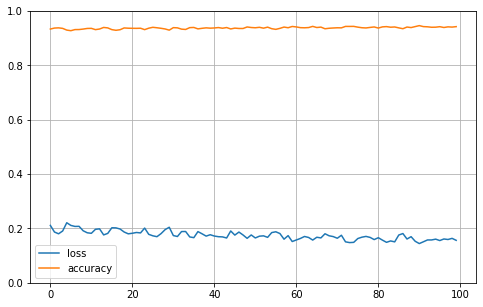

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
import random
def gen_text(model,tokenizer,seq_length,seed_text,num_gen_words):
    output_text = []
    input_text = seed_text # initial seeding text s
    for i in range(num_gen_words):
        encoded_text = tokenizer.texts_to_sequences([input_text])[0] # it retuns a tuple of item	
        pad_encoded = tf.keras.preprocessing.sequence.pad_sequences([encoded_text],maxlen=seq_length,padding='pre') # as if user add a long or short text then it corrects it.
        pred_word_ind = model.predict_classes(pad_encoded,verbose=0)[0]   #pred prob for each words.
        
        pred_word=tokenizer.index_word[pred_word_ind]
        		
        input_text += ' '+pred_word
        output_text.append(pred_word)
    	
    return ' '.join(output_text)

random.seed(101)
random_pick=random.randint(0,len(text_seq))
random_seed_text=text_seq[random_pick]# choosing randomly words
seed_text=' '.join(random_seed_text)
print(seed_text)

gen_text(model,tokenizer,seq_length,seed_text=seed_text,num_gen_words=1000)


gown grabbed gracious gradually gram grand grandfather grandfather's granduncle grass grateful gravy great greater greedy green greeting grew grey grim


"the sun must have gone down for it and a while he had eaten swept at an adventure some or even he said and the gorgeous row bilbo had just enough wits left when bert they came and a dragon marked in red on the mountain said balin but it will be a big lamp with a red shad he spread a piece of it said bert and after we shan't get through the business till late the usual had sat down in the kitchen nearly down and the shadows were arming the dwarves rushed at the fire more head with the goblins and the moon and talked and talked and time got up trembling and the in rug shaking like a jelly bawl south on the fat and mountains in front of them when loud came a ring at the deep places of their little loose scale of their armour there were lots of dragons in the north in those quick gandalf made a bad wet evening to begin on they even the gandalf's hobbit bred off a silver scarf over which a white mat i do myself you remember the poorest of us had money to spend and to lend a long journey a 